Необходимо смоделировать 2 количественных признака для трех случаев:

1. X, Y - гауссовское распределение, имеют монотонную зависимость 
2. X, Y - негауссовское распределение, имеют линейную монотонную зависимость 
3. X, Y - негауссовское распределение, имеют нелинейную немонотонную зависимость

Для полученных данных проверить гипотезу о зависимости признаков тремя критериями:

1. Выборочный коэффициент корреляции 
2. Критерий спирмана Критерий 
3. Хи-квадрат Пирсона 

Вычислить частоту ошибок второго рода для каждого случая и сравнить полученные результаты.

In [1]:
import numpy as np
from scipy import stats as sts
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

In [187]:
def sample1(mu, sigma, n):
    x = np.random.normal(mu, sigma, n)
    y = 0.4 * x - 3 * np.random.normal(mu, sigma, n)
    return x, y

def sample2(mu, sigma, n):
    x = np.random.normal(mu, sigma, n)
    y = 0.4 * x**3 + 5 * np.random.normal(mu, sigma, n)
    return x, y

def sample3(mu, sigma, n):
    x = np.random.normal(mu, sigma, n)
    y = 0.4 * x**2 + 2 * np.random.normal(mu, sigma, n)
    return x, y

In [176]:
# Выборочный коэффициент корреляции
def corr_coef_test(x, y, alpha=0.05):
    n = len(x)
    x_mean = x.mean()
    y_mean = y.mean()

    # Pearson
    r = (
            1/n * np.sum((x - x_mean)*(y - y_mean)) / 
            (1/n*np.sum((x - x_mean)**2) * 1/n*np.sum((y - y_mean)**2))**0.5
    )
    t = n ** 0.5 * r
    # p-value
    p_value = np.min(np.array([2 * sts.norm.cdf(t), 2 - 2 * sts.norm.cdf(t)]), axis=0)
    if (p_value > alpha / 2) and (p_value < (1 - alpha / 2)):
        h0 = 'Принимаем H0'
    else:
        h0 = 'Отвергаем H0'
    return r, p_value, h0

In [177]:
# Критерий Спирмена
def spearman_test(x, y, alpha=0.05):
    n = len(x)
    x_ranks = sts.rankdata(x)
    y_ranks = sts.rankdata(y)

    s = np.sum((x_ranks - y_ranks)**2)
    # Spearman
    r = 1 - 6*s/(n**3 - n)
    t = (n-1)**0.5 * r
    p_value = np.min(np.array([2 * sts.norm.cdf(t), 2 - 2 * sts.norm.cdf(t)]), axis=0)
    if (p_value > alpha / 2) and (p_value < (1 - alpha / 2)):
        h0 = 'Принимаем H0'
    else:
        h0 = 'Отвергаем H0'
    return r, p_value, h0

In [178]:
# Критерий Пирсона (хи-квадрат)
def to_nominal(x, k):
    x_sort = np.sort(x)
    x_in_scale = np.zeros(k)
    slices = np.linspace(x_sort[0], x_sort[-1], k+1)
    for i in range(k):
        x_part = x[x >= slices[i]]
        x_count = (x_part <= slices[i+1]).sum()
        x_in_scale[i] = x_count
    return x_in_scale

def chi2_test(x, y, alpha=0.05):
    n = len(x)
    x_nom, y_nom = to_nominal(x, 5), to_nominal(y, 5)
    matrix = np.concatenate(([x_nom], [y_nom]))
    chi_square_value = 0

    for i in range(2):
        for j in range(len(x_nom)):
            chi_square_value += (matrix[i][j] - (np.sum(matrix[i]) * np.sum(matrix[:,j]) / np.sum(matrix))) ** 2 \
            / (np.sum(matrix[i]) * np.sum(matrix[:,j]) / np.sum(matrix))

    # cdf
    p_value = 1 - sts.chi2.cdf(chi_square_value, (len(x_nom) - 1))
    if p_value > alpha:
        h0_true = 'Принимаем H0'
    else:
        h0_true = 'Отвергаем H0'
    return chi_square_value, p_value, h0_true

In [179]:
# перевод из текста
def summarize_hypothesis(listed_text):
    return sum(1 if text == 'Принимаем H0' else 0 for text in listed_text)

# Подсчёт ошибок 2-го рода
def beta_errors(amount, f, mu, sigma, size):
    corr_coef_res  = []
    spearman_res = []
    pearson_res   = []
    for _ in range(amount):
        x, y = f(mu, sigma, size)
        corr_coef_res.append(corr_coef_test(x, y)[2])
        spearman_res.append(spearman_test(x, y)[2])
        pearson_res.append(chi2_test(x, y)[2])
    
    
    
    corr_coef_freq = summarize_hypothesis(corr_coef_res) / amount
    spearman_freq = summarize_hypothesis(spearman_res) / amount
    pearson_freq = summarize_hypothesis(pearson_res) / amount
    
    return corr_coef_freq, spearman_freq, pearson_freq

# Распределения

## X, Y - гауссовское распределение, имеют монотонную зависимость

In [180]:
mu1 = 2
sigma1 = 4
size1 = 1000

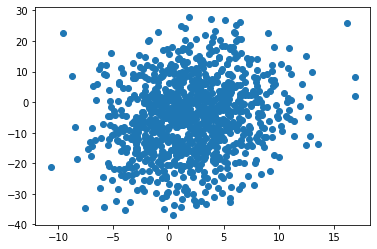

In [188]:
x1, y1 = sample1(mu1, sigma1, size1)
plt.scatter(x1, y1)
plt.show()

##### Выборочный коэффициент корреляции

In [182]:
corr_coeff, p_value, h0_res = corr_coef_test(x1, y1)
print(f'Выборочный коэффициент корреляции: {corr_coeff}, P-value: {p_value}, {h0_res}')
corr_coeff_lib, p_value_lib = sts.pearsonr(x1, y1)
print(f'corr_coeff_lib: {corr_coeff_lib}, p_value_lib: {p_value_lib}')

Выборочный коэффициент корреляции: 0.05003824543014319, P-value: 0.11357009002475804, Принимаем H0
corr_coeff_lib: 0.05003824543014315, p_value_lib: 0.11379578171034968


##### Критерий Спирмена

In [183]:
spearman_corr, p_value, h0_res = spearman_test(x1, y1)
print(f'Критерий Спирмена: {spearman_corr}, P-value: {p_value}, {h0_res}')
spearman_corr_lib, p_value_lib = sts.spearmanr(x1, y1)
print(f'Spearman_lib: {spearman_corr_lib}, p_value_lib: {p_value_lib}')

Критерий Спирмена: 0.04255091455091453, P-value: 0.17865588057153747, Принимаем H0
Spearman_lib: 0.04255091455091455, p_value_lib: 0.17878543795288201


##### Критерий $\chi^2$

In [184]:
chi2_corr, p_value, h0_res = chi2_test(x1, y1)
print(f'Критерий Хи-квадрат: {chi2_corr}, P-value: {p_value}, {h0_res}')
chi2_lib, p_value_lib, _, _ = chi2_contingency([to_nominal(x1, 5), to_nominal(y1, 5)])
print(f'chi2_lib: {chi2_lib}, p_value_lib: {p_value_lib}')

Критерий Хи-квадрат: 25.271957290161282, P-value: 4.435580989048393e-05, Отвергаем H0
chi2_lib: 25.271957290161282, p_value_lib: 4.4355809890498834e-05


Подсчет ошибок 2-го рода

In [189]:
amount = 1000
sample = sample1
mu = 2
sigma = 4
size = 1000

In [190]:
%%time
corr_freq, spearman_freq, chi2_freq = beta_errors(amount, sample, mu, sigma, size)
print('Гауссовское распределение:')
print(f'corr_coef_test = {corr_freq}')
print(f'spearman_test = {spearman_freq}')
print(f'pearson_test = {chi2_freq}')

Гауссовское распределение:
corr_coef_test = 0.017
spearman_test = 0.032
pearson_test = 0.155
Wall time: 3.58 s


## X, Y - негауссовское распределение, имеют линейную монотонную зависимость

In [92]:
mu2 = 0
sigma2 = 2
size2 = 1000

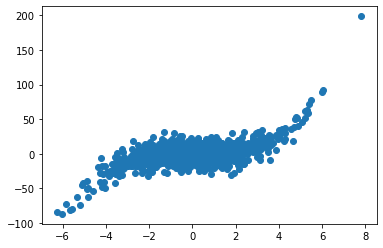

In [95]:
x2, y2 = sample2(mu2, sigma2, size2)
plt.scatter(x2, y2)
plt.show()

##### Выборочный коэффициент корреляции

In [96]:
corr_coeff, p_value, h0_res = corr_coef_test(x2, y2)
print(f'Выборочный коэффициент корреляции: {corr_coeff}, P-value: {p_value}, {h0_res}')
corr_coeff_lib, p_value_lib = sts.pearsonr(x2, y2)
print(f'corr_coeff_lib: {corr_coeff_lib}, p_value_lib: {p_value_lib}')

Выборочный коэффициент корреляции: 0.6071980274934726, P-value: 0.0, Отвергаем H0
corr_coeff_lib: 0.6071980274934723, p_value_lib: 8.699162820158478e-102


##### Критерий Спирмена

In [133]:
spearman_corr, p_value, h0_res = spearman_test(x2, y2)
print(f'Критерий Спирмена: {spearman_corr}, P-value: {p_value}, {h0_res}')
spearman_corr_lib, p_value_lib = sts.spearmanr(x2, y2)
print(f'Spearman_lib: {spearman_corr_lib}, p_value_lib: {p_value_lib}')

Критерий Спирмена: 0.43744640944640945, P-value: 0.0, Отвергаем H0
Spearman_lib: 0.4374464094464095, p_value_lib: 5.3647684182597867e-48


##### Критерий $\chi^2$

In [98]:
chi2_corr, p_value, h0_res = chi2_test(x2, y2)
print(f'Критерий Хи-квадрат: {chi2_corr}, P-value: {p_value}, {h0_res}')
chi2_lib, p_value_lib, _, _ = chi2_contingency([to_nominal(x2, 5), to_nominal(y2, 5)])
print(f'chi2_lib: {chi2_lib}, p_value_lib: {p_value_lib}')

Критерий Хи-квадрат: 862.420944388723, P-value: 0.0, Отвергаем H0
chi2_lib: 862.4209443887229, p_value_lib: 2.3086955851538105e-185


Подсчет ошибок 2-го рода

In [99]:
amount = 1000
sample = sample2
mu = 0
sigma = 2
size = 100

In [100]:
%%time
corr_freq, spearman_freq, chi2_freq = beta_errors(amount, sample, mu, sigma, size)
print('Негауссовское монотонное распределение:')
print(f'corr_coef_test = {corr_freq}')
print(f'spearman_test = {spearman_freq}')
print(f'pearson_test = {chi2_freq}')

Негауссовское монотонное распределение:
corr_coef_test = 0.001
spearman_test = 0.011
pearson_test = 0.135
Wall time: 2.9 s


## X, Y - негауссовское распределение, имеют нелинейную немонотонную зависимость

In [83]:
mu3 = 0
sigma3 = 2
size3 = 1000

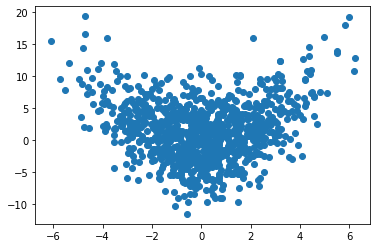

In [84]:
x3, y3 = sample3(mu3, sigma3, size3)
plt.scatter(x3, y3)
plt.show()

##### Выборочный коэффициент корреляции

In [85]:
corr_coeff, p_value, h0_res = corr_coef_test(x3, y3)
print(f'Выборочный коэффициент корреляции: {corr_coeff}, P-value: {p_value}, {h0_res}')
corr_coeff_lib, p_value_lib = sts.pearsonr(x3, y3)
print(f'corr_coeff_lib: {corr_coeff_lib}, p_value_lib: {p_value_lib}')

Выборочный коэффициент корреляции: 0.02887822212499452, P-value: 0.36113233331286576, Принимаем H0
corr_coeff_lib: 0.028878222124994513, p_value_lib: 0.36163309987127107


##### Критерий Спирмена

In [134]:
spearman_corr, p_value, h0_res = spearman_test(x3, y3)
print(f'Критерий Спирмена: {spearman_corr}, P-value: {p_value}, {h0_res}')
spearman_corr_lib, p_value_lib = sts.spearmanr(x3, y3)
print(f'Spearman_lib: {spearman_corr_lib}, p_value_lib: {p_value_lib}')

Критерий Спирмена: 0.012044316044315995, P-value: 0.7034375715337322, Принимаем H0
Spearman_lib: 0.012044316044316045, p_value_lib: 0.7036394998918469


##### Критерий $\chi^2$

In [87]:
chi2_corr, p_value, h0_res = chi2_test(x3, y3)
print(f'Критерий Хи-квадрат: {chi2_corr}, P-value: {p_value}, {h0_res}')
chi2_lib, p_value_lib, _, _ = chi2_contingency([to_nominal(x3, 5), to_nominal(y3, 5)])
print(f'chi2_lib: {chi2_lib}, p_value_lib: {p_value_lib}')

Критерий Хи-квадрат: 105.65428050505628, P-value: 0.0, Отвергаем H0
chi2_lib: 105.65428050505628, p_value_lib: 6.144206461060153e-22


Подсчет ошибок 2-го рода

In [88]:
amount = 1000
sample = sample3
mu = 0
sigma = 2
size = 1000

In [89]:
%%time
corr_freq, spearman_freq, chi2_freq = beta_errors(amount, sample, mu, sigma, size)
print('Негауссовское немонотонное распределение:')
print(f'corr_coef_test = {corr_freq}')
print(f'spearman_test = {spearman_freq}')
print(f'pearson_test = {chi2_freq}')

Негауссовское немонотонное распределение:
corr_coef_test = 0.846
spearman_test = 0.928
pearson_test = 0.028
Wall time: 3.52 s
